## Load Dataset

In [8]:
import pandas as pd

# Load CSV
df = pd.read_csv("movies_ratings.csv")
print(df.head())


   userId  movieId                    title  rating
0       1        1         Toy Story (1995)     4.0
1       1        2           Jumanji (1995)     3.5
2       1        3  Grumpier Old Men (1995)     2.0
3       2        1         Toy Story (1995)     5.0
4       2        2           Jumanji (1995)     3.0


In [9]:
print(df.isnull().sum())


userId     0
movieId    0
title      0
rating     0
dtype: int64


## Create User-Movie Matrix

In [10]:
user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
print(user_movie_matrix)


title   Father of the Bride Part II (1995)  Grumpier Old Men (1995)  \
userId                                                                
1                                      NaN                      2.0   
2                                      NaN                      NaN   
3                                      NaN                      3.0   
4                                      3.5                      2.5   

title   Jumanji (1995)  Toy Story (1995)  Waiting to Exhale (1995)  
userId                                                              
1                  3.5               4.0                       NaN  
2                  3.0               5.0                       4.5  
3                  NaN               4.5                       4.0  
4                  4.0               NaN                       NaN  


In [11]:
matrix_filled = user_movie_matrix.fillna(0)
print(matrix_filled)


title   Father of the Bride Part II (1995)  Grumpier Old Men (1995)  \
userId                                                                
1                                      0.0                      2.0   
2                                      0.0                      0.0   
3                                      0.0                      3.0   
4                                      3.5                      2.5   

title   Jumanji (1995)  Toy Story (1995)  Waiting to Exhale (1995)  
userId                                                              
1                  3.5               4.0                       0.0  
2                  3.0               5.0                       4.5  
3                  0.0               4.5                       4.0  
4                  4.0               0.0                       0.0  


## Exploratory Data Analysis (EDA)

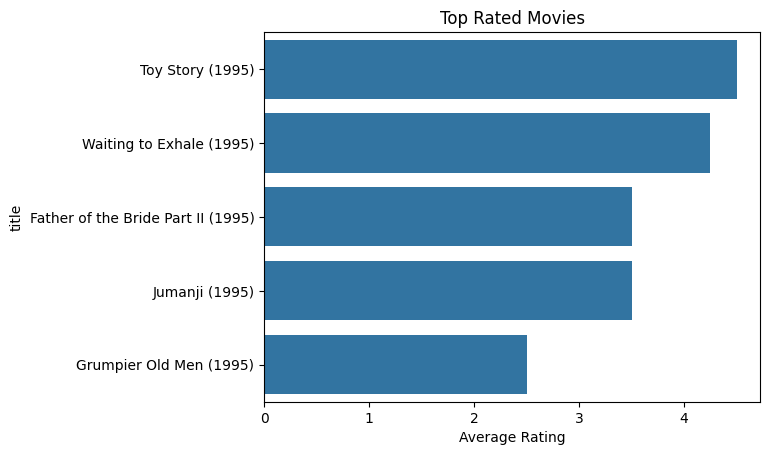

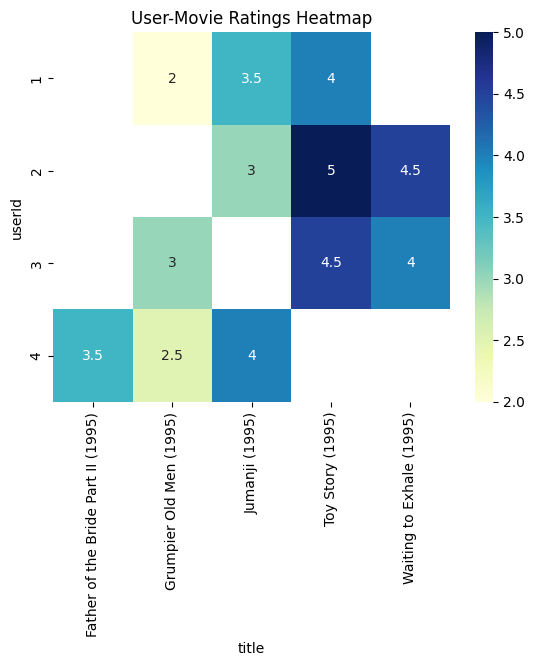

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top-rated movies by average rating
top_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title("Top Rated Movies")
plt.xlabel("Average Rating")
plt.show()

# Heatmap of ratings (user-movie matrix)
sns.heatmap(user_movie_matrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title("User-Movie Ratings Heatmap")
plt.show()


## Compute Movie Similarity

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill NaN with 0 (or mean rating)
matrix_filled = user_movie_matrix.fillna(0)

# Compute similarity between movies
similarity = cosine_similarity(matrix_filled.T)  # transpose to get movies as rows
similarity_df = pd.DataFrame(similarity, index=matrix_filled.columns, columns=matrix_filled.columns)
print(similarity_df)


title                               Father of the Bride Part II (1995)  \
title                                                                    
Father of the Bride Part II (1995)                            1.000000   
Grumpier Old Men (1995)                                       0.569803   
Jumanji (1995)                                                0.655386   
Toy Story (1995)                                              0.000000   
Waiting to Exhale (1995)                                      0.000000   

title                               Grumpier Old Men (1995)  Jumanji (1995)  \
title                                                                         
Father of the Bride Part II (1995)                 0.569803        0.655386   
Grumpier Old Men (1995)                            1.000000        0.634849   
Jumanji (1995)                                     0.634849        1.000000   
Toy Story (1995)                                   0.626138        0.607130   
Waiting

## Recommendation Function


In [14]:
def recommend(movie_name, top_n=5):
    if movie_name not in similarity_df.columns:
        return "Movie not found!"
    
    sim_scores = similarity_df[movie_name].sort_values(ascending=False)
    recommended_movies = sim_scores.index[1:top_n+1].tolist()  # skip the movie itself
    return recommended_movies

# Example
print(recommend("Toy Story (1995)"))


['Waiting to Exhale (1995)', 'Grumpier Old Men (1995)', 'Jumanji (1995)', 'Father of the Bride Part II (1995)']
